In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pylorentz import Momentum4
import os

In [9]:
initial = np.load("logs/herwigEvent/runs/2023-04-16_12-41-55/data/initial.npz")
# final = np.load("logs/herwigEvent/runs/2023-04-22_12-07-45/data/final.npz")
final = np.load("logs/herwigEvent/runs/2023-04-28_10-18-42/data/best.npz")
herwig = np.load("initial.npz")
outdir = "hadmlplots_herwig_var_best"
os.makedirs(outdir, exist_ok=True)

In [10]:
hadrons_predictions_i = initial['hadrons_predictions']
hadrons_predictions_f = final['hadrons_predictions']
hadrons_truths = initial['hadrons_truths']
generated_event_label_i = initial['generated_event_label']
generated_event_label_f = final['generated_event_label']
observed_event_label = initial['observed_event_label']
hadrons_herwig = herwig['hadrons_truths']
herwig_event_label = herwig['observed_event_label']

In [11]:
observed_event_label

array([    0,     0,     0, ..., 29999, 29999, 29999])

In [12]:
nhads_gen_i = np.array([np.sum(generated_event_label_i == i) for i in range(generated_event_label_i.max()+1)])
nhads_gen_f = np.array([np.sum(generated_event_label_f == i) for i in range(generated_event_label_f.max()+1)])
nhads_obs = np.array([np.sum(observed_event_label == i) for i in range(observed_event_label.max()+1)])
nhads_herwig = np.array([np.sum(herwig_event_label == i) for i in range(herwig_event_label.max()+1)])

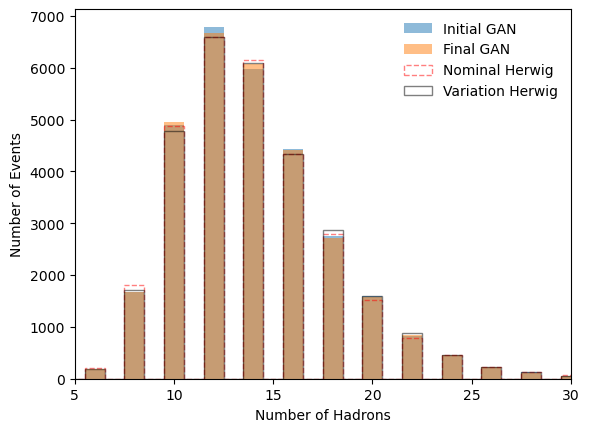

In [13]:
_=plt.hist(nhads_gen_i,bins=np.linspace(-0.5,100.5,102),alpha=0.5,label="Initial GAN")
_=plt.hist(nhads_gen_f,bins=np.linspace(-0.5,100.5,102),alpha=0.5,label="Final GAN")
_=plt.hist(nhads_herwig,bins=np.linspace(-0.5,100.5,102),alpha=0.5,label="Nominal Herwig",histtype="step",color="red", linestyle="--")
_=plt.hist(nhads_obs,bins=np.linspace(-0.5,100.5,102),alpha=0.5,label="Variation Herwig",histtype="step",color="black")
plt.xlim([5,30])
plt.xlabel("Number of Hadrons")
plt.ylabel("Number of Events")
plt.legend(frameon=False)
plt.savefig(f"{outdir}/nhadrons.pdf",bbox_inches='tight')

In [14]:
Eratio_pred_i = []
dR_pred_i = []
theta_rest_pred_i = []
phi_rest_pred_i = []
for ievent in range(generated_event_label_i.max()+1):
    if (ievent%1000==0):
        print(ievent,generated_event_label_i.max())
    event = hadrons_predictions_i[generated_event_label_i==ievent]
    E = event[:,0]
    px = event[:,1]
    py = event[:,2]
    pz = event[:,3]
    p = np.sqrt(px**2+py**2+pz**2)
    pT = np.sqrt(px**2+py**2)
    eta = np.arctanh(pz/p)
    phi = np.arctan(py/px)
    for jpart in range(len(E)):
        mindR = 99999.
        minindex = -1
        for kpart in range(len(E)):
            if (jpart==kpart):
                continue
            dR2 = (eta[jpart] - eta[kpart])**2 + np.arccos(np.cos(phi[jpart] - phi[kpart]))**2
            dR = dR2**0.5
            if (dR < mindR):
                mindR = dR
                minindex = kpart
        #print(jpart,kpart,mindR,minindex)
        Eratio_pred_i += [np.min([E[jpart],E[minindex]])/(E[jpart]+E[minindex])]
        dR_pred_i += [mindR]
        had1 = Momentum4.m_eta_phi_pt(0.135, eta[jpart], phi[jpart], pT[jpart])
        had2 = Momentum4.m_eta_phi_pt(0.135, eta[minindex], phi[minindex], pT[minindex])
        cluster = had1+had2
        had1_clusterframe = had1.boost_particle(-cluster)
        had2_clusterframe = had2.boost_particle(-cluster)
        theta_rest_pred_i+=[had1_clusterframe.theta]
        phi_rest_pred_i+=[had1_clusterframe.phi]
        
Eratio_pred_f = []
dR_pred_f = []
theta_rest_pred_f = []
phi_rest_pred_f = []
for ievent in range(generated_event_label_f.max()+1):
    if (ievent%1000==0):
        print(ievent,generated_event_label_f.max())
    event = hadrons_predictions_f[generated_event_label_f==ievent]
    E = event[:,0]
    px = event[:,1]
    py = event[:,2]
    pz = event[:,3]
    p = np.sqrt(px**2+py**2+pz**2)
    pT = np.sqrt(px**2+py**2)
    eta = np.arctanh(pz/p)
    phi = np.arctan(py/px)
    for jpart in range(len(E)):
        mindR = 99999.
        minindex = -1
        for kpart in range(len(E)):
            if (jpart==kpart):
                continue
            dR2 = (eta[jpart] - eta[kpart])**2 + np.arccos(np.cos(phi[jpart] - phi[kpart]))**2
            dR = dR2**0.5
            if (dR < mindR):
                mindR = dR
                minindex = kpart
        #print(jpart,kpart,mindR,minindex)
        Eratio_pred_f += [np.min([E[jpart],E[minindex]])/(E[jpart]+E[minindex])]
        dR_pred_f += [mindR]
        had1 = Momentum4.m_eta_phi_pt(0.135, eta[jpart], phi[jpart], pT[jpart])
        had2 = Momentum4.m_eta_phi_pt(0.135, eta[minindex], phi[minindex], pT[minindex])
        cluster = had1+had2
        had1_clusterframe = had1.boost_particle(-cluster)
        had2_clusterframe = had2.boost_particle(-cluster)
        theta_rest_pred_f+=[had1_clusterframe.theta]
        phi_rest_pred_f+=[had1_clusterframe.phi]
        
Eratio_true = []
dR_true = []
theta_rest_truth = []
phi_rest_truth = []
for ievent in range(observed_event_label.max()+1):
    if (ievent%1000==0):
        print(ievent,observed_event_label.max())
    event = hadrons_truths[observed_event_label==ievent]
    E = event[:,0]
    px = event[:,1]
    py = event[:,2]
    pz = event[:,3]
    p = np.sqrt(px**2+py**2+pz**2)
    pT = np.sqrt(px**2+py**2)
    eta = np.arctanh(pz/p)
    phi = np.arctan(py/px)
    for jpart in range(len(E)):
        mindR = 99999.
        minindex = -1
        for kpart in range(len(E)):
            if (jpart==kpart):
                continue
            dR2 = (eta[jpart] - eta[kpart])**2 + np.arccos(np.cos(phi[jpart] - phi[kpart]))**2
            dR = dR2**0.5
            if (dR < mindR):
                mindR = dR
                minindex = kpart
        #print(jpart,kpart,mindR,minindex)
        Eratio_true += [np.min([E[jpart],E[minindex]])/(E[jpart]+E[minindex])]
        dR_true += [mindR]
        had1 = Momentum4.m_eta_phi_pt(0.135, eta[jpart], phi[jpart], pT[jpart])
        had2 = Momentum4.m_eta_phi_pt(0.135, eta[minindex], phi[minindex], pT[minindex])
        cluster = had1+had2
        had1_clusterframe = had1.boost_particle(-cluster)
        had2_clusterframe = had2.boost_particle(-cluster)
        theta_rest_truth+=[had1_clusterframe.theta]
        phi_rest_truth+=[had1_clusterframe.phi]

Eratio_herwig = []
dR_herwig = []
theta_rest_herwig = []
phi_rest_herwig = []
for ievent in range(herwig_event_label.max()+1):
    if (ievent%1000==0):
        print(ievent,herwig_event_label.max())
    event = hadrons_herwig[herwig_event_label==ievent]
    E = event[:,0]
    px = event[:,1]
    py = event[:,2]
    pz = event[:,3]
    p = np.sqrt(px**2+py**2+pz**2)
    pT = np.sqrt(px**2+py**2)
    eta = np.arctanh(pz/p)
    phi = np.arctan(py/px)
    for jpart in range(len(E)):
        mindR = 99999.
        minindex = -1
        for kpart in range(len(E)):
            if (jpart==kpart):
                continue
            dR2 = (eta[jpart] - eta[kpart])**2 + np.arccos(np.cos(phi[jpart] - phi[kpart]))**2
            dR = dR2**0.5
            if (dR < mindR):
                mindR = dR
                minindex = kpart
        #print(jpart,kpart,mindR,minindex)
        Eratio_herwig += [np.min([E[jpart],E[minindex]])/(E[jpart]+E[minindex])]
        dR_herwig += [mindR]
        had1 = Momentum4.m_eta_phi_pt(0.135, eta[jpart], phi[jpart], pT[jpart])
        had2 = Momentum4.m_eta_phi_pt(0.135, eta[minindex], phi[minindex], pT[minindex])
        cluster = had1+had2
        had1_clusterframe = had1.boost_particle(-cluster)
        had2_clusterframe = had2.boost_particle(-cluster)
        theta_rest_herwig+=[had1_clusterframe.theta]
        phi_rest_herwig+=[had1_clusterframe.phi]

0 29999
1000 29999
2000 29999
3000 29999
4000 29999
5000 29999
6000 29999
7000 29999
8000 29999
9000 29999
10000 29999
11000 29999
12000 29999
13000 29999
14000 29999
15000 29999
16000 29999
17000 29999
18000 29999
19000 29999
20000 29999
21000 29999
22000 29999
23000 29999
24000 29999
25000 29999
26000 29999
27000 29999
28000 29999
29000 29999
0 29999
1000 29999
2000 29999
3000 29999
4000 29999
5000 29999
6000 29999
7000 29999
8000 29999
9000 29999
10000 29999
11000 29999
12000 29999
13000 29999
14000 29999
15000 29999
16000 29999
17000 29999
18000 29999
19000 29999
20000 29999
21000 29999
22000 29999
23000 29999
24000 29999
25000 29999
26000 29999
27000 29999
28000 29999
29000 29999
0 29999
1000 29999
2000 29999
3000 29999
4000 29999
5000 29999
6000 29999
7000 29999
8000 29999
9000 29999
10000 29999
11000 29999
12000 29999
13000 29999
14000 29999
15000 29999
16000 29999
17000 29999
18000 29999
19000 29999
20000 29999
21000 29999
22000 29999
23000 29999
24000 29999
25000 29999
26000 2

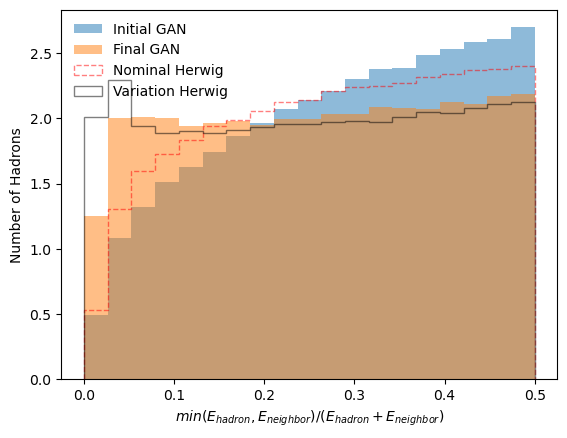

In [15]:
plt.hist(Eratio_pred_i,alpha=0.5,bins=np.linspace(0,0.5,20),label="Initial GAN", density=True)
plt.hist(Eratio_pred_f,alpha=0.5,bins=np.linspace(0,0.5,20),label="Final GAN", density=True)
plt.hist(Eratio_herwig,alpha=0.5,bins=np.linspace(0,0.5,20),histtype="step",label="Nominal Herwig",color="red", linestyle="--", density=True)
plt.hist(Eratio_true,alpha=0.5,bins=np.linspace(0,0.5,20),histtype="step",color="black",label="Variation Herwig", density=True)
plt.legend(frameon=False)
plt.ylabel("Number of Hadrons")
plt.xlabel("$min(E_{hadron},E_{neighbor})/(E_{hadron}+E_{neighbor})$")
plt.savefig(f"{outdir}/Eratio.pdf",bbox_inches='tight')

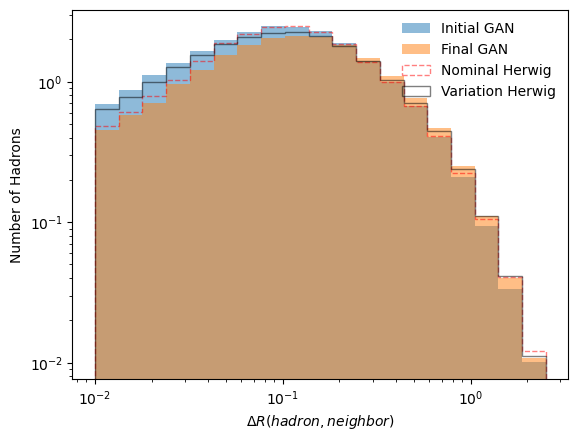

In [16]:
plt.hist(dR_pred_i,alpha=0.5,bins=np.logspace(-2,0.4,20),label="Initial GAN", density=True)
plt.hist(dR_pred_f,alpha=0.5,bins=np.logspace(-2,0.4,20),label="Final GAN", density=True)
plt.hist(dR_herwig,alpha=0.5,bins=np.logspace(-2,0.4,20),histtype="step",label="Nominal Herwig",color="red", linestyle="--", density=True)
plt.hist(dR_true,alpha=0.5,bins=np.logspace(-2,0.4,20),histtype="step",color="black",label="Variation Herwig", density=True)
plt.legend(frameon=False)
plt.ylabel("Number of Hadrons")
plt.xlabel("$\Delta R(hadron,neighbor)$")
plt.xscale("log")
plt.yscale("log")
plt.savefig(f"{outdir}/dR.pdf",bbox_inches='tight')

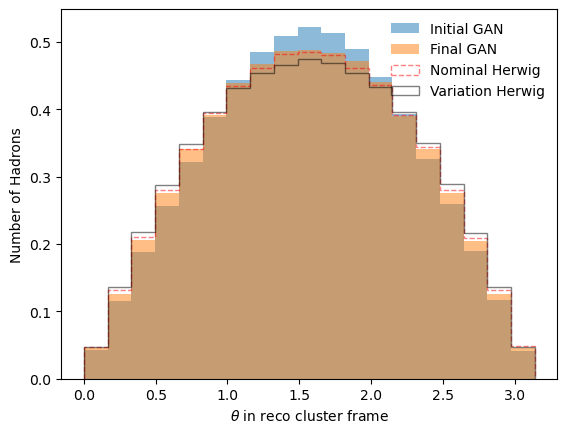

In [17]:
plt.hist(theta_rest_pred_i,alpha=0.5,bins=np.linspace(0,np.pi,20),label="Initial GAN", density=True)
plt.hist(theta_rest_pred_f,alpha=0.5,bins=np.linspace(0,np.pi,20),label="Final GAN", density=True)
plt.hist(theta_rest_herwig,alpha=0.5,bins=np.linspace(0,np.pi,20),histtype="step",label="Nominal Herwig",color="red", linestyle="--", density=True)
plt.hist(theta_rest_truth,alpha=0.5,bins=np.linspace(0,np.pi,20),histtype="step",color="black",label="Variation Herwig", density=True)
plt.legend(frameon=False)
plt.ylabel("Number of Hadrons")
plt.xlabel(r"$\theta$ in reco cluster frame")
plt.savefig(f"{outdir}/theta.pdf",bbox_inches='tight')

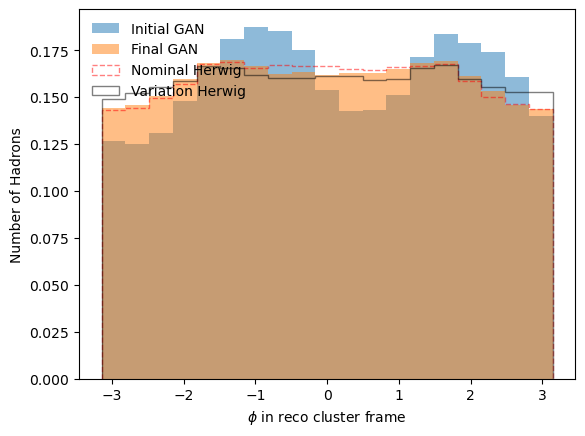

In [18]:
plt.hist(phi_rest_pred_i,alpha=0.5,bins=np.linspace(-np.pi,np.pi,20),label="Initial GAN", density=True)
plt.hist(phi_rest_pred_f,alpha=0.5,bins=np.linspace(-np.pi,np.pi,20),label="Final GAN", density=True)
plt.hist(phi_rest_herwig,alpha=0.5,bins=np.linspace(-np.pi,np.pi,20),histtype="step",label="Nominal Herwig",color="red", linestyle="--", density=True)
plt.hist(phi_rest_truth,alpha=0.5,bins=np.linspace(-np.pi,np.pi,20),histtype="step",color="black",label="Variation Herwig", density=True)
plt.legend(frameon=False)
plt.ylabel("Number of Hadrons")
plt.xlabel(r"$\phi$ in reco cluster frame")
# plt.ylim([0,30000])
plt.savefig(f"{outdir}/phi.pdf",bbox_inches='tight')